In [1]:
#from mylib import *
from hexalattice.hexalattice import *
import matplotlib.pyplot as plt

base_dir = "/mnt/z/Users/Kevin/Pictures/tbg/"


def to_rgba(hex, alpha):
    return ((hex >> 16) / 256, ((hex >> 8) & 0xFF) / 256, (hex & 0xFF) / 256, alpha)

colorAB = 0xfda58c
colorBA = 0x72d0ef



def j4bondline(xy1, xy2, color=None):
    xy1 = (
        xy1[0] * np.sqrt(3) * latticeconstant + xy1[1] * np.sqrt(3) * latticeconstant / 2,
        xy1[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    xy2 = (
        (xy2[0] + 1/2) * np.sqrt(3) * latticeconstant + xy2[1] * np.sqrt(3) * latticeconstant / 2,
        xy2[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    j4bondlineabs(xy1, xy2, 6, latticeconstant, color=color)

def j4bondlineabs(xy1, xy2, thick, latcon, do=[0, 1, 2], color=None):
    if color is None:
        color = to_rgba(color4, 1)
        
    if xy1[1] > xy2[1]:
        xy1, xy2 = xy2, xy1
        
    if abs(xy1[1] - xy2[1]) > 2 * abs(xy1[0] - xy2[0]):
        if 0 in do: ax.plot([xy1[0], xy1[0]], [xy1[1], xy1[1] + latcon], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0]], [xy2[1], xy2[1] - latcon], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0], xy2[0]], [xy1[1] + latcon, xy2[1] - latcon], lw=thick, color=color, zorder=3) 
    elif xy1[0] > xy2[0]:
        if 0 in do: ax.plot([xy1[0], xy1[0] - latcon*np.sqrt(3)/2], [xy1[1], xy1[1] + latcon/2], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0] + latcon*np.sqrt(3)/2], [xy2[1], xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0] - latcon*np.sqrt(3)/2, xy2[0] + latcon*np.sqrt(3)/2],
                    [xy1[1] + latcon/2, xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
    else:
        if 0 in do: ax.plot([xy1[0], xy1[0] + latcon*np.sqrt(3)/2], [xy1[1], xy1[1] + latcon/2], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0] - latcon*np.sqrt(3)/2], [xy2[1], xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0] + latcon*np.sqrt(3)/2, xy2[0] - latcon*np.sqrt(3)/2],
                    [xy1[1] + latcon/2, xy2[1] - latcon/2], lw=thick, color=color, zorder=3) 
            
color4 = 0x9d4bad

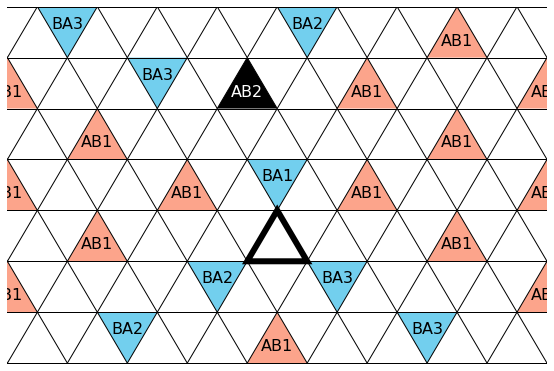

In [2]:
R = 1

def draw_hexalattice(color=None):
    from matplotlib import collections as mc
    if color is None:
        color = "black"
    Hexa = []
    HexaLines = []

    for y in range(-8, 9, 1):
        xlen = 20
        xrange = (-(y // 2) - xlen // 2, -(y // 2) + xlen - xlen // 2)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            
            if y % 2 == 1:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x < xrange[1] - 1:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
            elif y > -8:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x > xrange[0]:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 2))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None):
    for x in range(-10, 10):
        for y in range(-10, 10):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=False, edgecolor=color))

def adddowntri(xy, name, **kwargs):
    xy = trilatloc(xy, "down")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,zorder=-1,
        orientation=np.pi, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def adduptri(xy, name, **kwargs):
    xy = trilatloc(xy, "up")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
                                      zorder=-1,
        orientation=0, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def addarrow(downxy, upxy):
    downxy = trilatloc(downxy, "down")
    upxy = trilatloc(upxy, "up")
    
    ax.add_patch(mpatches.FancyArrow(upxy[0], upxy[1], downxy[0] - upxy[0], downxy[1] - upxy[1], color="black", width=0.10, head_width=0.5, head_length=0.5, length_includes_head=True))    



import functools

rt3 = \
[
    (-4, 5), (2, 5),
    (-8, 4), (1, 4), (4, 4),
    (-6, 3), (-0, 3), (3, 3),
    (-7, 2), (-4, 2), (2, 2), (5, 2),
    (-5, 1), (-2, 1), (1, 1), (4, 1),
    (-3, 0), (3, 0),
    (-4, -1), (5, -1),
    (1, -2),
]

colorDisplaced = 0xfdb6bd
    
fig, ax = plt.subplots(1, 1, figsize=[7.8*2/2, (6.5+4.02)/2])

for i in rt3:
    adduptri(i, "", facecolor=to_rgba(colorAB, 1))
    xy = trilatloc(i, "up")
    ax.text(xy[0], xy[1], "AB1", fontsize=16, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)
    
for i in [(-2, 4), (-1, 5), (-1, -1), (-2, -2)]:
    adddowntri(i, "", facecolor=to_rgba(colorBA, 1))
    xy = trilatloc(i, "down")
    ax.text(xy[0], xy[1], "BA2", fontsize=16, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)
    
for i in [(-4, 3), (-6, 4), (1, -1), (3, -2)]:
    adddowntri(i, "", facecolor=to_rgba(colorBA, 1))
    xy = trilatloc(i, "down")
    ax.text(xy[0], xy[1], "BA3", fontsize=16, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)
    
for i in [(-1, 1)]:
    adddowntri(i, "", facecolor=to_rgba(colorBA, 1))
    xy = trilatloc(i, "down")
    ax.text(xy[0], xy[1], "BA1", fontsize=16, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)
   

adduptri((-2, 3), "", facecolor="k")
xy = trilatloc((-2, 3), "up")
ax.text(xy[0], xy[1], "AB2", fontsize=16, horizontalalignment='center', color="white", verticalalignment='center', zorder=1, clip_on=True)


adduptri((0, 0), "", facecolor="w", edgecolor="k", lw=6)

ax.set_xlim([-7.8, 7.8])
ax.set_ylim([-4.02, 6.5])
ax.axis("off")
draw_hexalattice()

plt.tight_layout()
plt.savefig(base_dir + "conserve.png", dpi=200)
plt.savefig(base_dir + "conserve.svg", dpi=200)

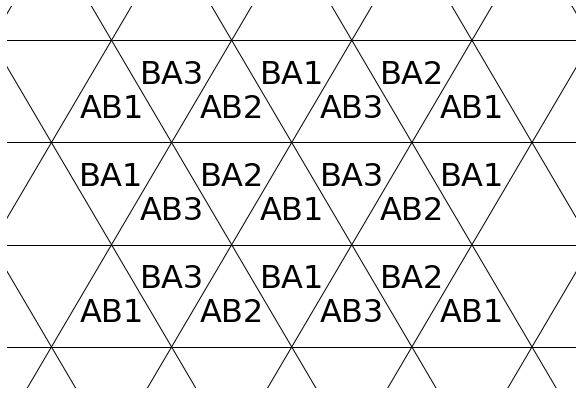

In [4]:
fig, ax = plt.subplots(1, 1, figsize=[(6.7+1.5), (4+1.6)])

for i in [(-3, 0), (0, 0), (-2, 1), (-4, 2), (-1, 2)]:
    adduptri(i, "", facecolor="white")#to_rgba(colorAB, 1))
    xy = trilatloc(i, "up")
    ax.text(xy[0], xy[1], "AB1", fontsize=32, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)
    
for i in [(-2, 0), (-1, 1), (-3, 2)]:
    adduptri(i, "", facecolor="white")#to_rgba(colorAB, 1))
    xy = trilatloc(i, "up")
    ax.text(xy[0], xy[1], "AB2", fontsize=32, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)

for i in [(-1, 0), (-3, 1), (-2, 2)]:
    adduptri(i, "", facecolor="white")#to_rgba(colorAB, 1))
    xy = trilatloc(i, "up")
    ax.text(xy[0], xy[1], "AB3", fontsize=32, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)

for i in [(-2, 0), (-4, 1), (-1, 1), (-3, 2)]:
    adddowntri(i, "", facecolor="white")#to_rgba(colorBA, 1))
    xy = trilatloc(i, "down")
    ax.text(xy[0], xy[1], "BA1", fontsize=32, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)
    
for i in [(-1, 0), (-3, 1), (-2, 2)]:
    adddowntri(i, "", facecolor="white")#to_rgba(colorBA, 1))
    xy = trilatloc(i, "down")
    ax.text(xy[0], xy[1], "BA2", fontsize=32, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)
    
for i in [(-3, 0), (-2, 1), (-4, 2)]:
    adddowntri(i, "", facecolor="white")#to_rgba(colorBA, 1))
    xy = trilatloc(i, "down")
    ax.text(xy[0], xy[1], "BA3", fontsize=32, horizontalalignment='center', verticalalignment='center', zorder=1, clip_on=True)
    
    
ax.set_xlim([-6.7, 1.5])
ax.set_ylim([-1.6, 4])
ax.axis("off")
draw_hexalattice()

plt.tight_layout()
plt.savefig(base_dir + "sublattices.png", dpi=100)
plt.savefig(base_dir + "sublattices.svg", dpi=100)

In [ ]:
R = 1

def draw_hexalattice(color=None):
    from matplotlib import collections as mc
    if color is None:
        color = "black"
    Hexa = []
    HexaLines = []

    for y in range(-8, 9, 1):
        xlen = 20
        xrange = (-(y // 2) - xlen // 2, -(y // 2) + xlen - xlen // 2)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            
            if y % 2 == 1:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x < xrange[1] - 1:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
            elif y > -8:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x > xrange[0]:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 2))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None):
    for x in range(-10, 10):
        for y in range(-10, 10):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=False, edgecolor=color))

def adddowntri(xy, name, **kwargs):
    xy = trilatloc(xy, "down")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,zorder=-1,
        orientation=np.pi, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def adduptri(xy, name, **kwargs):
    xy = trilatloc(xy, "up")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
                                      zorder=-1,
        orientation=0, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def addarrow(downxy, upxy):
    downxy = trilatloc(downxy, "down")
    upxy = trilatloc(upxy, "up")
    
    ax.add_patch(mpatches.FancyArrow(upxy[0], upxy[1], downxy[0] - upxy[0], downxy[1] - upxy[1], color="black", width=0.10, head_width=0.5, head_length=0.5, length_includes_head=True))    



import functools

rt3 = \
[
    (-4, 5), (2, 5),
    (-8, 4), (1, 4), (4, 4),
    (-6, 3), (-0, 3), (3, 3),
    (-7, 2), (-4, 2), (2, 2), (5, 2),
    (-5, 1), (-2, 1), (1, 1), (4, 1),
    (-3, 0), (3, 0),
    (-4, -1), (5, -1),
    (1, -2),
]

colorDisplaced = 0xfdb6bd
    
fig, ax = plt.subplots(1, 1, figsize=[7.8*2/2, (6.5+4.02)/2])

   

adduptri((-2, 3), "", facecolor="k")
xy = trilatloc((-2, 3), "up")
ax.text(xy[0], xy[1], "2", fontsize=30, horizontalalignment='center', color="white", verticalalignment='center', zorder=1, clip_on=True)


adduptri((0, 0), "", facecolor="w", edgecolor="k", lw=6)

ax.set_xlim([-7.8, 7.8])
ax.set_ylim([-4.02, 6.5])
ax.axis("off")
draw_hexalattice()

plt.tight_layout()
plt.savefig(base_dir + "conserve.png", dpi=100)
plt.savefig(base_dir + "conserve.svg", dpi=100)

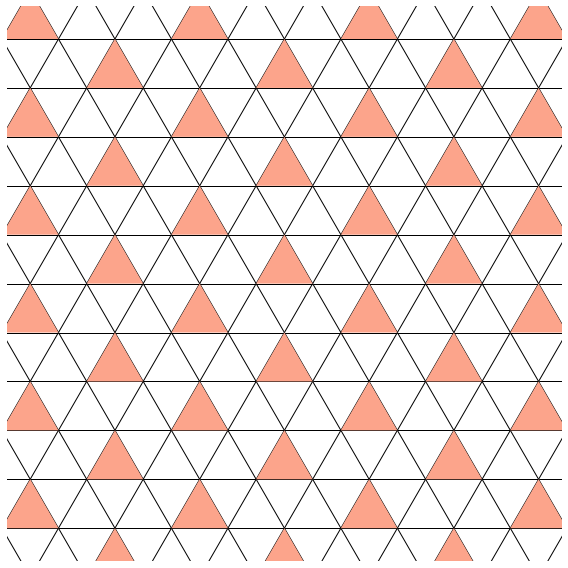

In [4]:
rt3 = functools.reduce(lambda a, x: a + x, [
    [(x - i, y + 2 * i) for x, y in
        [
            (-3, -3), (0, -3), (3, -3), (6, -3),
            (-4, -4), (-1, -4), (2, -4), (5, -4), (8, -4),
        ]
    ] for i in range(-1, 8)
], [])

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

for i in rt3:
    adduptri(i, "", facecolor=to_rgba(colorAB, 1))

ax.set_xlim([-8.5, 8.5])
ax.set_ylim([-9.5, 7.5])
ax.axis("off")
draw_hexalattice()
plt.tight_layout()
plt.savefig(base_dir + "rt3.png", dpi=100)
plt.savefig(base_dir + "rt3.svg", dpi=100)

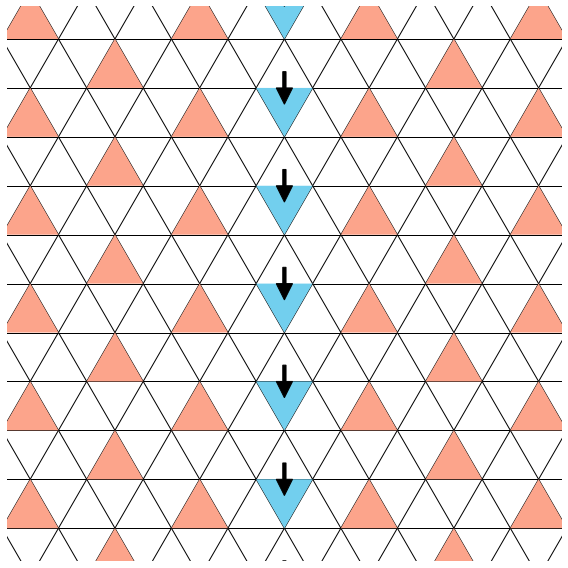

In [5]:
rt3 = \
functools.reduce(lambda a, x: a + x, [
    [(x - i, y + 2 * i) for x, y in
        [
            (-3, -3), (0, -3), (3, -3), (6, -3),
            (-4, -4), (-1, -4), (5, -4), (8, -4),
        ]
    ] for i in range(-4, 6)
], [])


boundary = [
    (-4, 7),
    (-3, 5),
    (-2, 3),
    (-1, 1),
    (0, -1),
    (1, -3),
    (2, -5),
    (3, -7),
]

displacedrt3 = [
    (-4, 8),
    (-3, 6),
    (-2, 4),
    (-1, 2),
    (0, 0),
    (1, -2),
    (2, -4),
    (3, -6),
]

    
fig, ax = plt.subplots(1, 1, figsize=[8, 8])

for i in rt3:
    adduptri(i, "", facecolor=to_rgba(colorAB, 1))

for i, j in zip(boundary, displacedrt3):
    adddowntri(i, "", facecolor=to_rgba(colorBA, 1))
    #adduptri(j, "", facecolor=to_rgba(colorDisplaced, 1))
    addarrow(i, j)

ax.set_xlim([-8.5, 8.5])
ax.set_ylim([-9.5, 7.5])
ax.axis("off")
draw_hexalattice()
plt.tight_layout()
plt.savefig(base_dir + "flipline.png", dpi=100)
plt.savefig(base_dir + "flipline.svg", dpi=100)

In [14]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

def drawstate(A, B, J4, name, lattice="tri", wf="tri", annotate_j4=[], annotate_wf=[], doubleA=[], holes=([],[]), lim=None):
    annotate_j4 = []
    import matplotlib.collections as mc
    if wf == "tri":
        for index, i in enumerate(A):
            adduptri(i, index, facecolor=to_rgba(colorAB, 1))
        for index, i in enumerate(B):
            adddowntri(i, index, facecolor=to_rgba(colorBA, 1))
    else:
        for i in A:
            xy = trilatloc(i, "up")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor=to_rgba(colorAB, 1), ec='k'))
            if i in doubleA:
                ax.text(xy[0], xy[1], "↑↓", fontfamily="serif", fontsize=15, zorder=3, horizontalalignment='center', verticalalignment='center')
                
        for i in B:
            xy = trilatloc(i, "down")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor=to_rgba(colorBA, 1), ec='k'))
            
        for i in holes[0]:
            xy = trilatloc(i, "up")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor='white', ec='k'))
        
                
        for i in holes[1]:
            xy = trilatloc(i, "down")
            ax.add_patch(mpatches.Circle(xy, radius=R/3, facecolor='white', ec='k'))
            
    for i, j, ab, txt in annotate_wf:
        xy = trilatloc((i, j), ab)
        ax.add_patch(mpatches.Circle((xy[0], xy[1]), 0.45, lw=1, edgecolor="k", facecolor="white", fill=True, zorder=5))
        ax.text(xy[0], xy[1], txt, fontfamily="serif", fontsize=20, zorder=5, horizontalalignment='center', verticalalignment='center')
        
    
    ind = 0
    for i, j in J4:
        Axy = trilatloc(A[i], "up")
        Bxy = trilatloc(B[j], "down")
        j4bondlineabs(Axy, Bxy, 4, R)
        # ax.plot([Axy[0], Bxy[0]], [Axy[1], Bxy[1]], color=to_rgba(color4, 1), lw=5, zorder=1.5)
        if ind in annotate_j4:
            midpoint = ((Axy[0] + Bxy[0])/2, (Axy[1] + Bxy[1])/2)
            ax.add_patch(mpatches.Circle((midpoint[0], midpoint[1]), 0.3, lw=5, edgecolor="#1f8915", facecolor="white", fill=True, zorder=2))
            ax.text(midpoint[0], midpoint[1], "J$_4$", fontfamily="serif", fontsize=20, zorder=3, horizontalalignment='center', verticalalignment='center')
            
        ind += 1

    ax.set_xlim([-0.2, 24.2])
    ax.set_ylim([-5.2, 19.2])
    ax.axis("off")
    
    if height < 8:
        ax.set_xlim([0, 16])
        ax.set_ylim([0, 16])
    
    if lim is not None:
        ax.set_xlim([lim[0], lim[1]])
        ax.set_ylim([lim[2], lim[3]])
    
    plt.tight_layout()
    
    if lattice == "tri":
        draw_hexalattice()
    else:
        draw_duallattice()

    if name is not None:
        plt.savefig(base_dir + name + ".png", dpi=300)
        plt.savefig(base_dir + name + ".svg", dpi=300)

In [7]:
h0 = -10
w0 = -10
height = 20
width = 20

def draw_hexalattice(color=None):
    from matplotlib import collections as mc
    if color is None:
        color = "black"
    Hexa = []
    HexaLines = []

    yrange = (h0, height + 1)
    for y in range(yrange[0], yrange[1]):
        xrange = (w0, width + 1)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
                
            if y > yrange[0]:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xrange[1] + xrange[0]))
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xrange[1] + xrange[0] - 1))
            
            #if x < xrange[1] - 1:
                #HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None, highlight=[]):
    if color is None:
        color = "black"
    for x in range(1 + h0, width):
        for y in range(1 + h0, height):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=(x, y) in highlight, facecolor='pink', edgecolor=color))
    xy = trilatloc((0, 0), "down")
    xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
    ax.plot([xy[0] + R*np.sqrt(3)/2, xy[0] + R*np.sqrt(3)], [xy[1] + R/2, xy[1] + R], color=color, lw=1, zorder=-0.5)
    xy = trilatloc((width - 1, height - 1), "down")
    xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
    ax.plot([xy[0] + R*np.sqrt(3)/2, xy[0] + R*np.sqrt(3)], [xy[1] + R/2, xy[1] + R], color=color, lw=1, zorder=-0.5)

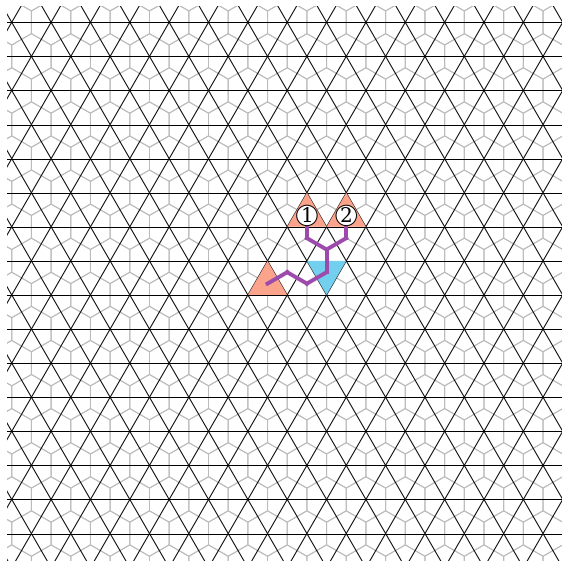

In [8]:
h0 = -10
w0 = -10
height = 20
width = 20

A = [(4, 5), (4, 7), (5, 7)]
B = [(5, 5)]

fig, ax = plt.subplots(1, 1, figsize=[8, 8])
draw_duallattice("#bbbbbb")
drawstate(A, B, [(0, 0), (1, 0), (2, 0)], "root3tri", lattice="tri", annotate_wf=[(4, 7, "up", "1"), (5, 7, "up", 2)])

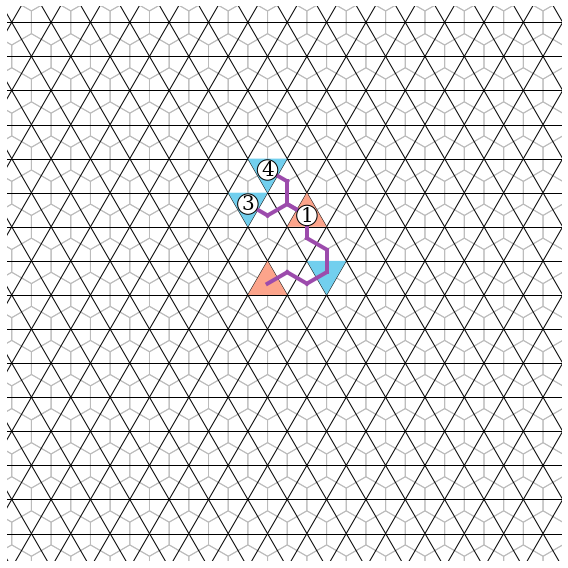

In [9]:
A = [(4, 5), (4, 7)]
B = [(5, 5), (2, 7), (2, 8)]

fig, ax = plt.subplots(1, 1, figsize=[8, 8])
draw_duallattice("#bbbbbb")
drawstate(A, B, [(0, 0), (1, 0), (1, 1), (1, 2)], "root3tri", lattice="tri", annotate_wf=[(4, 7, "up", 1), (2, 7, "down", "3"), (2, 8, "down", 4)])

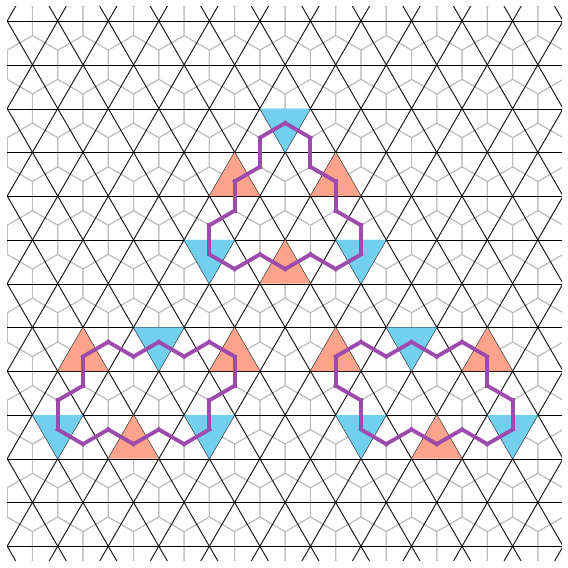

In [15]:
h0 = -10
w0 = -10
height = 20
width = 20

A = [(0, 3), (3, 3), (2, 1),   (5, 3), (8, 3), (8, 1),   (3, 5), (1, 7), (3, 7)]
B = [(0, 1), (3, 1), (1, 3),   (6, 1), (9, 1), (6, 3),   (1, 5), (4, 5), (1, 8)]


fig, ax = plt.subplots(1, 1, figsize=[8, 8])

#ax.add_patch(mpatches.Circle((5, 3), radius=R*0.8, facecolor="white", ec='k'))
#ax.text(5, 3, "A", fontfamily="serif", fontsize=25, zorder=3, horizontalalignment='center', verticalalignment='center')
#ax.add_patch(mpatches.Circle((14, 3), radius=R*0.8, facecolor="white", ec='k'))
#ax.text(14, 3, "B", fontfamily="serif", fontsize=25, zorder=3, horizontalalignment='center', verticalalignment='center')
#ax.add_patch(mpatches.Circle((9.5, 9), radius=R*0.8, facecolor="white", ec='k'))
#ax.text(9.5, 9, "C", fontfamily="serif", fontsize=25, zorder=3, horizontalalignment='center', verticalalignment='center')
draw_duallattice("#bbbbbb")
drawstate(A, B, [(0, 0), (2, 0), (2, 1), (1, 1), (1, 2), (0, 2),
                (3, 3), (5, 3), (5, 4), (4, 4), (4, 5), (3, 5),
                (6, 6), (6, 7), (7, 6), (8, 7), (7, 8), (8, 8)], "buildingblocks", lattice="tri", annotate_wf=[], lim=[0, 19, -3, 16])

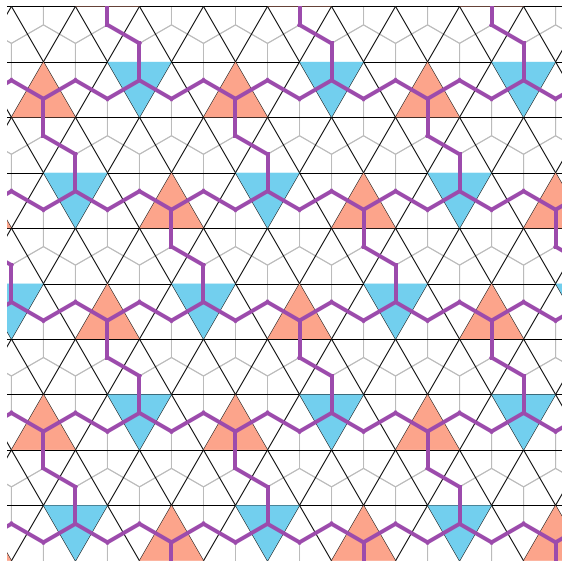

In [269]:
h0 = -10
w0 = -10
height = 20
width = 30

ncols = 15

A = [(col * 3, row * 2) for row in range(10) for col in range(ncols) ]
B = [(col * 3 + 1, row * 2) for row in range(10) for col in range(ncols) ]

J4 = []
for row in range(10):
    for col in range(ncols):
        J4.append((col + row * ncols, col + row * ncols))
        if col != ncols - 1:
            J4.append((col + row * ncols + 1, col + row * ncols))
        if row != 9:
            J4.append((col + (row + 1) * ncols, col + row * ncols))

fig, ax = plt.subplots(1, 1, figsize=[8, 8])
draw_duallattice("#bbbbbb")
drawstate(A, B, J4, "j4uniform", lattice="tri", annotate_wf=[], lim=[25, 40, 5, 20])

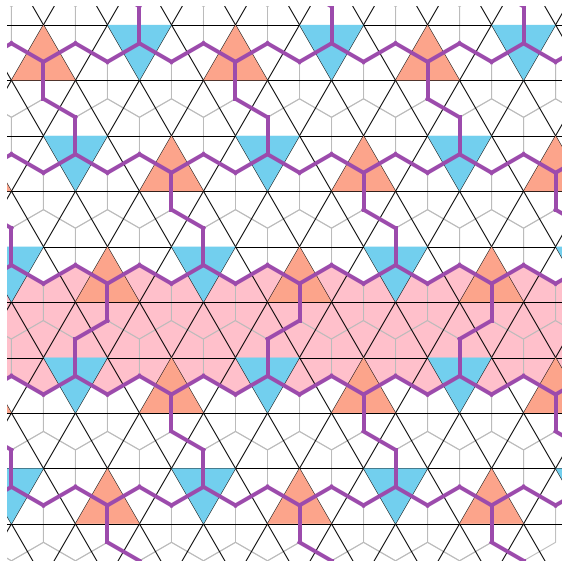

In [267]:
A = [(col * 3, row * 2) if row < 5 else (col * 3 + (row - 5), row * 2) for row in range(10) for col in range(ncols) ]
B = [(col * 3 + 1, row * 2) if row < 5 else (col * 3 + 1 + (row - 5), row * 2) for row in range(10) for col in range(ncols) ]

A = [(col * 3, row * 2) if row < 6 else (col * 3 + 1, row * 2) for row in range(10) for col in range(ncols) ]
B = [(col * 3 + 1, row * 2) if row < 6 else (col * 3 + 2, row * 2) for row in range(10) for col in range(ncols) ]

J4 = []
for row in range(10):
    for col in range(ncols):
        J4.append((col + row * ncols, col + row * ncols))
        if col != ncols - 1:
            J4.append((col + row * ncols + 1, col + row * ncols))
        if row != 9:
            J4.append((col + (row + 1) * ncols, col + row * ncols))

fig, ax = plt.subplots(1, 1, figsize=[8, 8])
draw_duallattice("#bbbbbb", highlight=[(x, y) for x in range(-10, 40) for y in range(10, 12)])
drawstate(A, B, J4, "j4row", lattice="tri", annotate_wf=[], lim=[25, 40, 10, 25])

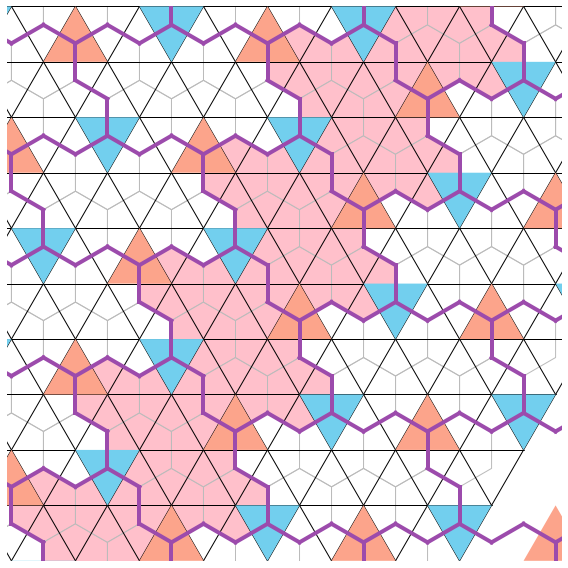

In [268]:
nrows = 10

A = [(col * 3, row * 2) if col > 4 else (col * 3, row * 2 + 1) for col in range(ncols) for row in range(nrows) ]
B = [(col * 3 + 1, row * 2) if col > 4 else (col * 3 + 1, row * 2 + 1) for col in range(ncols) for row in range(nrows) ]

J4 = []
for col in range(10):
    for row in range(nrows):
        J4.append((row + col * nrows, row + col * nrows))
        if row != 9:
            J4.append((row + col * nrows + 1, row + col * nrows))
        if col != 9:
            J4.append((row + (col + 1) * nrows, row + col * nrows))


fig, ax = plt.subplots(1, 1, figsize=[8, 8])
draw_duallattice("#bbbbbb", highlight=[(x, y) for x in range(14, 16) for y in range(-10, 40)] + \
                 [(13, y) for y in range(-10, 40, 2)] + \
                [(16, y) for y in range(-10, 40, 2)])
drawstate(A, B, J4, "j4col", lattice="tri", annotate_wf=[], lim=[25, 40, 5, 20])